#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

All of the Above 

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [22]:
!pip install numpy pandas matplotlib seaborn scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate fake data
np.random.seed(42)
df = pd.DataFrame({
    "Category": np.random.choice([f"Cat_{i}" for i in range(10)], size=1000),
    "Value1": np.random.normal(50, 10, 1000),
    "Value2": np.random.uniform(0, 100, 1000)
})


            Value1       Value2
count  1000.000000  1000.000000
mean     50.104442    50.726154
std      10.242074    29.161685
min      14.317947     0.018840
25%      43.514205    25.393643
50%      50.273596    52.249193
75%      57.302433    76.091283
max      81.419670    99.971380


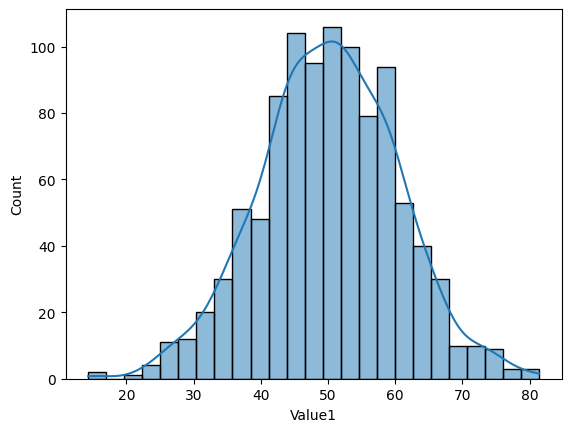

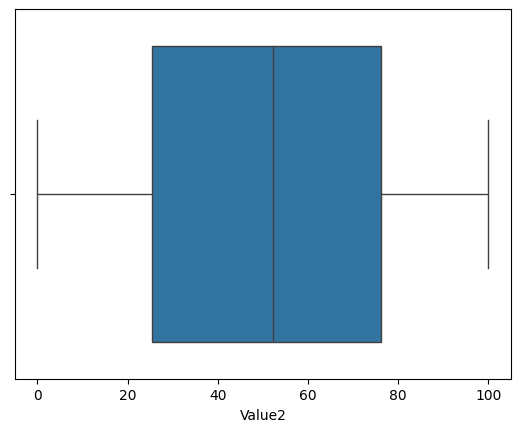

In [23]:
print(df[["Value1","Value2"]].describe())
sns.histplot(df["Value1"], kde=True); plt.show()
sns.boxplot(x=df["Value2"]); plt.show()


Category
Cat_0    118
Cat_2    110
Cat_9    107
Cat_4    107
Cat_7    100
Cat_5     96
Cat_3     94
Cat_6     94
Cat_8     91
Cat_1     83
Name: count, dtype: int64


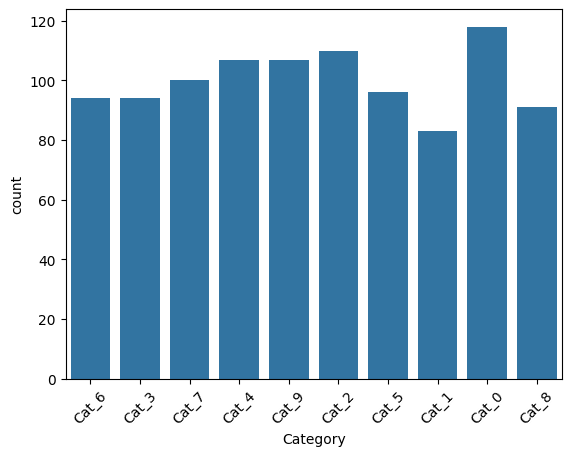

In [24]:
print(df["Category"].value_counts())
sns.countplot(x="Category", data=df); plt.xticks(rotation=45); plt.show()

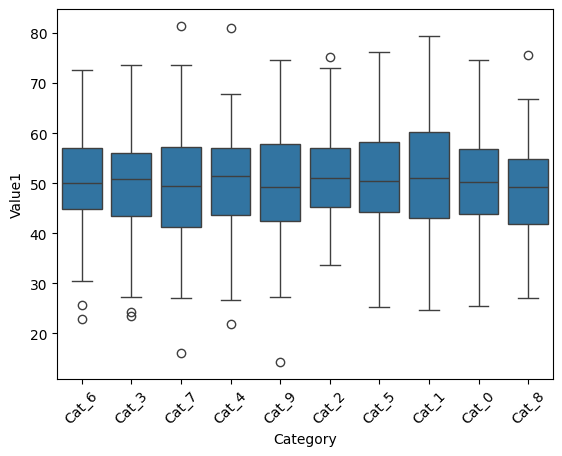

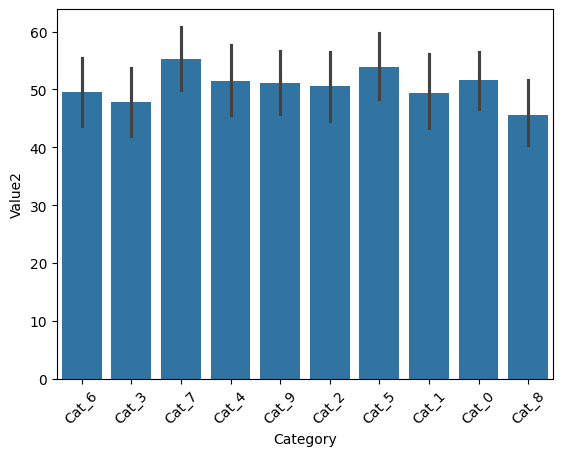

In [25]:
sns.boxplot(x="Category", y="Value1", data=df); plt.xticks(rotation=45); plt.show()
sns.barplot(x="Category", y="Value2", data=df, estimator=np.mean); plt.xticks(rotation=45); plt.show()


In [ ]:
# Your code here


#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [26]:
from numpy.random import choice, normal, randint

np.random.seed(42)

df = pd.DataFrame({
    "CatVar": choice([f"Group_{i}" for i in range(5)], size=1000),
    "Num1": normal(10, 2, 1000),
    "Num2": normal(1000, 200, 1000),
    "Num3": normal(0, 1, 1000),
    "Num4": normal(50, 15, 1000),
})



In [27]:
for col in df.columns:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

df["target"] = ((df["Num1"].fillna(10) + df["Num3"].fillna(0) + np.random.randn(1000)) > 10).astype(int)

print(df.head())


    CatVar       Num1         Num2      Num3       Num4  target
0  Group_3  10.218790  1059.750582 -0.734174  35.212943       0
1  Group_4  11.451533   849.641790  0.081996  45.737674       1
2      NaN  10.962018   914.728481  0.457280  67.921443       1
3      NaN  10.447768  1229.689142  1.455822  63.419708       1
4      NaN        NaN  1022.654082  0.704507  29.407108       1


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [ ]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    # - process numeric features (using an imputer and StandardScaler)
    # - define your pipeline using `pipeline = ...`

# TODO: Replace with your code (fill)
    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [16]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def run_classifier(df, classifier):
    y = df["target"].astype(int)
    X = df.drop(columns=["target"])

    cat_features = ["CatVar"]
    num_features = [c for c in X.columns if c not in cat_features]

    # Preprocessing
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_features),
            ("cat", categorical_transformer, cat_features)
        ]
    )

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)

# Logistic Regression
scores = run_classifier(df, LogisticRegression(max_iter=1000, random_state=42))
print(f"LogReg F1: mean={scores.mean():.3f}, std={scores.std():.3f}")

# Random Forest
scores_rf = run_classifier(df, RandomForestClassifier(random_state=42))
print(f"RF F1: mean={scores_rf.mean():.3f}, std={scores_rf.std():.3f}")



LogReg F1: mean=0.871, std=0.016
RF F1: mean=0.843, std=0.028


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

#If Logistic Regression performs better, it means the data is mostly linear and simple. If Random Forest wins, it’s because it handles nonlinear patterns and messy data better. The difference really comes down to the data’s structure and noise.Random Forest is more flexible. It can capture nonlinear patterns and interactions between variables that Logistic Regression can’t. It also handles categorical splits and messy data more naturally, which can give it an edge.